## Part2: Training a neural network

## Imports

In [13]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
%run utils.ipynb import *

## Prepare the data

In [14]:
# load training data
train = read_data('train.csv')
# load testing data
test = read_data('test.csv')

In [15]:
# clean the data
X_train_scaled, y_train_encoded, X_test_scaled, y_train_unique_length = clean_data(train, test)

### Hyperparameters settings #4 : Optimizer type Tuning

We will explore third hyperparameter which is **Optimizer** while keeping all other hyperparameters fixed

In [16]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LEARNING_RATE = 8e-2
optimizer = [Adam(learning_rate=LEARNING_RATE), SGD(learning_rate=LEARNING_RATE), RMSprop(learning_rate=LEARNING_RATE)]
optimizer_name = ['Adam', 'SGD', 'RMSprop']
DROPOUT_RATE = 0
DROPOUT = False

### Training the model #4

Start training for optimizer: Adam

The Evaluation of the model on the train data is:
Train loss = 0.7391649484634399
Train accuracy = 0.9797979593276978

End training for optimizer: Adam

Start training for optimizer: SGD

The Evaluation of the model on the train data is:
Train loss = 0.021060515195131302
Train accuracy = 0.9959595799446106

End training for optimizer: SGD

Start training for optimizer: RMSprop

The Evaluation of the model on the train data is:
Train loss = 0.31230565905570984
Train accuracy = 0.9838383793830872

End training for optimizer: RMSprop



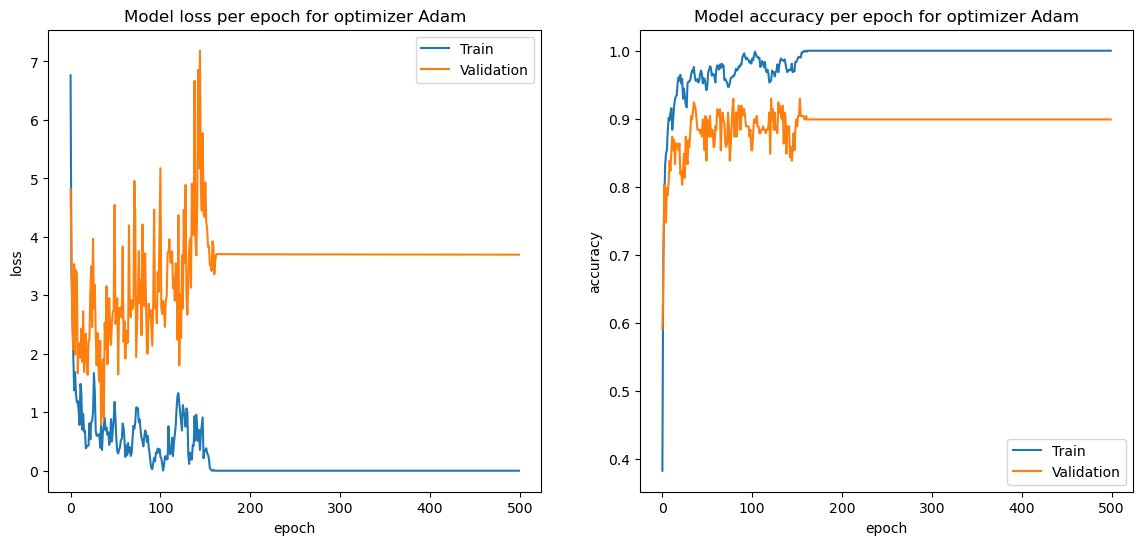

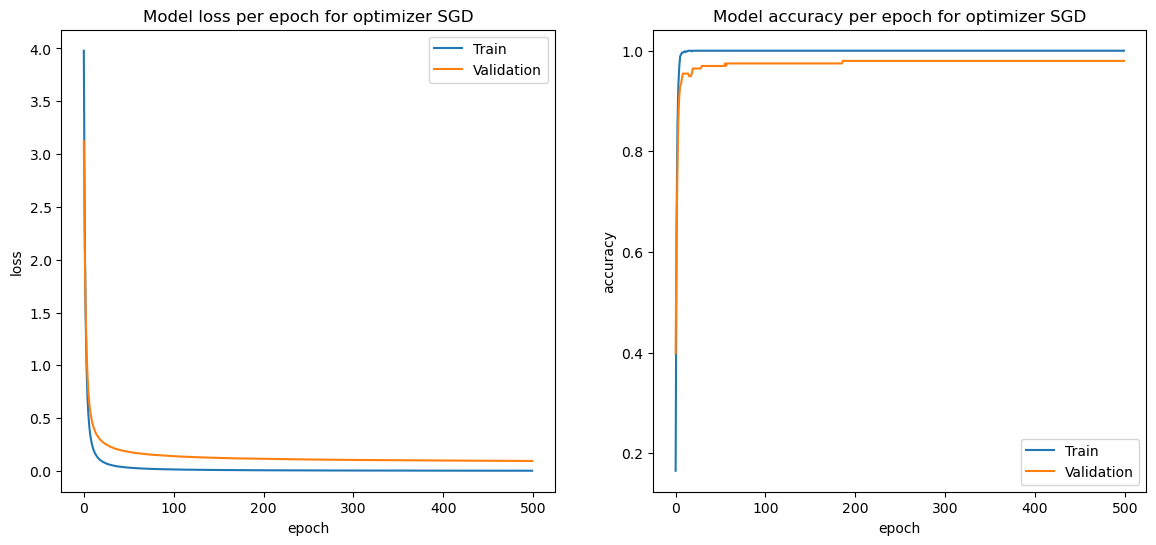

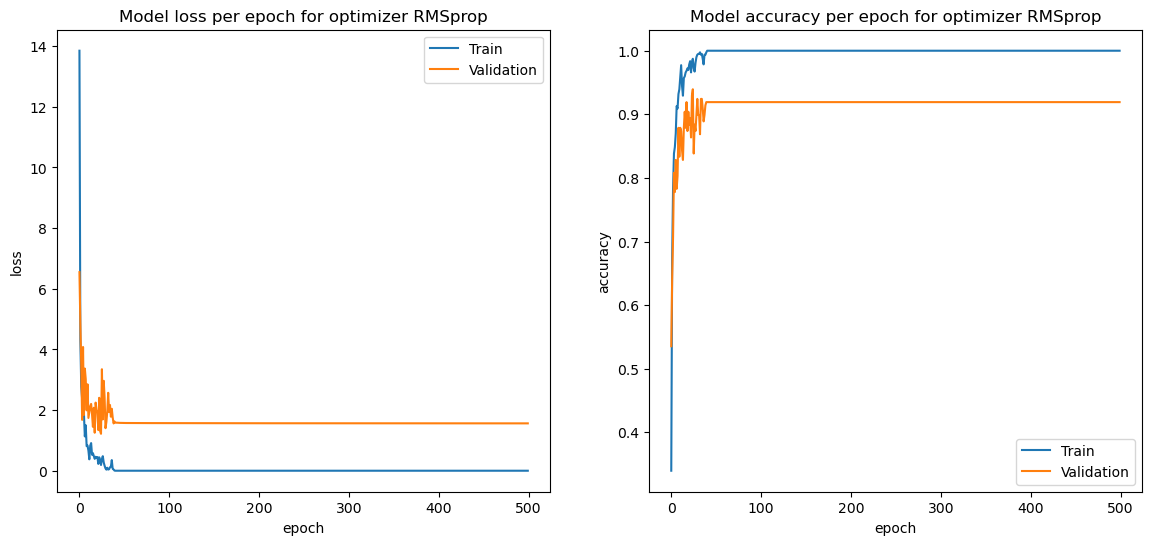

In [18]:
for opt_name, opt in zip(optimizer_name, optimizer):
    print('Start training for optimizer:', str(opt_name))
    model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
     opt, None,None)
    train_curves(history,'for optimizer',opt_name)
    loss, acc = evaluation(model= model, X= X_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for optimizer:', str(opt_name) + '\n')

So, from above the best optimizer to be used is **SGD**